(50000, 28, 28) (50000,)


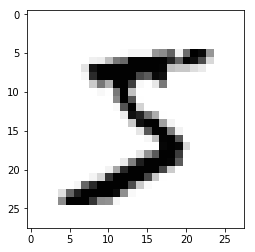

In [52]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [53]:
# imprting libraries
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [54]:
# transforming y labels 
ohe = OneHotEncoder(sparse = False)
y = np.concatenate((y_train, y_val, y_test))
y = y.reshape((y.shape[0], 1))
y_ohe = ohe.fit_transform(y)
y_train = y_ohe[:y_train.shape[0],:]
y_val = y_ohe[y_train.shape[0]:y_train.shape[0] + y_val.shape[0],:]
y_test = y_ohe[(y_train.shape[0] + y_val.shape[0]):,:]

In [55]:
# flatten X
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

In [80]:
# neural network parameters, 4 hidden layers with 256, 256, 128 and 64 neurons
n_features = X_train_flatten.shape[1]
n_obs = X_train_flatten.shape[0]
n_layer1 = 256
n_layer2 = 256
n_layer3 = 128
n_layer4 = 64
n_classes = y_ohe.shape[1]

learning_rate = 0.0003
batch_size = 250
n_epochs = 5 

In [81]:
# creating placeholders
tf.reset_default_graph()
input_X = tf.placeholder(dtype = tf.float32, shape = (None, n_features))
input_y = tf.placeholder(dtype = tf.int64, shape = (None, 10))

In [82]:
# creating hidden layers
with tf.name_scope(name = "layer1") as scope:
    W1 = tf.get_variable("W1", [n_features, n_layer1], initializer = tf.contrib.layers.xavier_initializer(seed = 147))
    b1 = tf.get_variable("b1", [1, n_layer1], initializer = tf.zeros_initializer())
    A1 = tf.nn.relu(tf.matmul(input_X, W1) + b1, name = "A1")
with tf.name_scope(name = "layer2") as scope:
    W2 = tf.get_variable("W2", [n_layer1, n_layer2], initializer = tf.contrib.layers.xavier_initializer(seed = 147))
    b2 = tf.get_variable("b2", [1, n_layer2], initializer = tf.zeros_initializer())
    A2 = tf.nn.relu(tf.matmul(A1, W2) + b2, name = "A2")
with tf.name_scope(name = "layer3") as scope:
    W3 = tf.get_variable("W3", [n_layer2, n_layer3], initializer = tf.contrib.layers.xavier_initializer(seed = 147))
    b3 = tf.get_variable("b3", [1, n_layer3], initializer = tf.zeros_initializer())
    A3 = tf.nn.relu(tf.matmul(A2, W3) + b3, name = "A3")
with tf.name_scope(name = "layer4") as scope:
    W4 = tf.get_variable("W4", [n_layer3, n_layer4], initializer = tf.contrib.layers.xavier_initializer(seed = 147))
    b4 = tf.get_variable("b4", [1, n_layer4], initializer = tf.zeros_initializer())
    A4 = tf.nn.relu(tf.matmul(A3, W4) + b4, name = "A4")
with tf.name_scope(name = "output_layer") as scope:
    W5 = tf.get_variable("W5", [n_layer4, n_classes], initializer = tf.contrib.layers.xavier_initializer(seed = 147))
    b5 = tf.get_variable("b5", [1, n_classes], initializer = tf.zeros_initializer())
    y_pred = tf.nn.relu(tf.matmul(A4, W5) + b5, name = "logits")

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_pred, labels = input_y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss)
correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(input_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
init = tf.global_variables_initializer()

In [83]:
# training neural network
loss_train = []
loss_test = []
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        n_mini_batches = int(n_obs / batch_size)
        for i in range(n_mini_batches):
            lower = i * batch_size
            upper = (i + 1) * batch_size
            X = X_train_flatten[lower:upper,:]
            y = y_train[lower:upper]
            l_train, _ = sess.run([loss, optimizer], feed_dict = {input_X: X, input_y: y})
            l_test = sess.run([loss], feed_dict = {input_X: X_test_flatten, input_y: y_test})
            loss_train.append(l_train)
            loss_test.append(l_test)
            if i % 50 == 0:
                print("Train loss:", l_train,", test loss:", l_test," for epoch: ",epoch,", batch: ", i)
    print('Neural network has been learned')
    print ("Train Accuracy:", accuracy.eval({input_X: X_train_flatten, input_y: y_train}))
    print ("Test Accuracy:", accuracy.eval({input_X: X_test_flatten, input_y: y_test}))

Train loss: 2.32622 , test loss: [2.2991161]  for epoch:  0 , batch:  0
Train loss: 1.00503 , test loss: [0.8289414]  for epoch:  0 , batch:  50
Train loss: 0.458454 , test loss: [0.54841757]  for epoch:  0 , batch:  100
Train loss: 0.512388 , test loss: [0.48494029]  for epoch:  0 , batch:  150
Train loss: 0.251792 , test loss: [0.2748293]  for epoch:  1 , batch:  0
Train loss: 0.515667 , test loss: [0.25141203]  for epoch:  1 , batch:  50
Train loss: 0.180016 , test loss: [0.20586163]  for epoch:  1 , batch:  100
Train loss: 0.201879 , test loss: [0.17902927]  for epoch:  1 , batch:  150
Train loss: 0.162053 , test loss: [0.16482875]  for epoch:  2 , batch:  0
Train loss: 0.392736 , test loss: [0.18356386]  for epoch:  2 , batch:  50
Train loss: 0.137047 , test loss: [0.15480442]  for epoch:  2 , batch:  100
Train loss: 0.144957 , test loss: [0.13840808]  for epoch:  2 , batch:  150
Train loss: 0.133992 , test loss: [0.13277629]  for epoch:  3 , batch:  0
Train loss: 0.281996 , test 

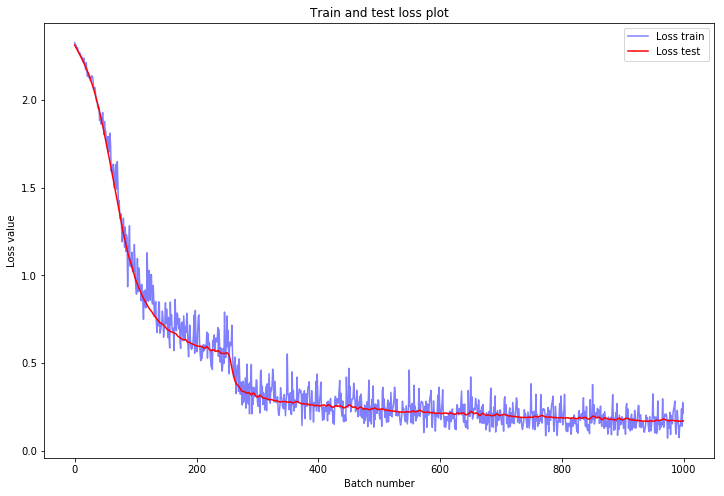

In [75]:
#loss function
plt.figure(figsize = (12, 8))
plt.plot(loss_train, color = 'blue', alpha = 0.5, label = 'Loss train')
plt.plot(loss_test, color = 'red', label = 'Loss test')
plt.title('Train and test loss plot')
plt.xlabel('Batch number')
plt.ylabel('Loss value')
plt.legend()
plt.show()